<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-eddieelorza/blob/main/RepasoTransformacio%CC%81nyreduccio%CC%81ndedimensiones_A01793547.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###PhD. María de la Paz Rico Fdz

## **Actividad de la Semana 5**
###**Repaso Transformación y reducción de dimensiones.**
###**Fecha de entrega: 27/10/2022.**

## **Alumno: Eddie Guadalupe Elorza Ruiz** | **Matrícula: A01793547**






# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
print("W")
print(W)
Winv = np.linalg.inv(W)
print("Winv")
print(Winv)
D = np.diag(values)
print("D")
print(D)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B=np.dot(W,D)
B=np.dot(B,Winv)
print(B.round(2))
print("El resultado de B=W*D*Winv si es igual al resultado de A")
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
W
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
Winv
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
D
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
El resultado de B=W*D*Winv si es igual al resultado de A
-----------------------------


In [ ]:
# Función para la descomposición y reconstrucción
def pca(X): #Realiza la descomposición y reconstrucción de la matriz
  print("-----Matriz original-----") #Imprime la matriz original
  print(X) #Imprime la matriz original
  print("-------------------------") 
  #Calculo de los valores y vectores eigen
  values, vectors = eig(X) #Calcula los valores y vectores eigen de la matriz
  #Definición de W, Winv y D
  W = vectors #W es igual a los vectores eigen
  Winv = np.linalg.inv(W) #Winv es igual a la inversa de W
  D = np.diag(values) #D es igual a los valores eigen
  #Reconstrucción de matriz
  print("-----Matriz reconstruida-----") 
  B=np.dot(W,D) #Multiplica W por D
  B=np.dot(B,Winv) #Multiplica el resultado anterior por Winv
  print(B.round(2)) #Imprime la matriz reconstruida
  print("------------------------")

In [ ]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]]) # Definición de matriz
pca(A1) #Llamada a función

-----Matriz original-----
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------------------------
-----Matriz reconstruida-----
[[ 3.-0.j  0.+0.j  2.+0.j]
 [ 3.-0.j  0.-0.j -2.+0.j]
 [ 0.-0.j  1.-0.j  1.+0.j]]
------------------------


In [ ]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]]) # Definición de matriz
pca(A2) #Llamada a función

-----Matriz original-----
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------------------------
-----Matriz reconstruida-----
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
------------------------


In [ ]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]]) # Definición de matriz
pca(A3) #Llamada a función

-----Matriz original-----
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------------------------
-----Matriz reconstruida-----
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


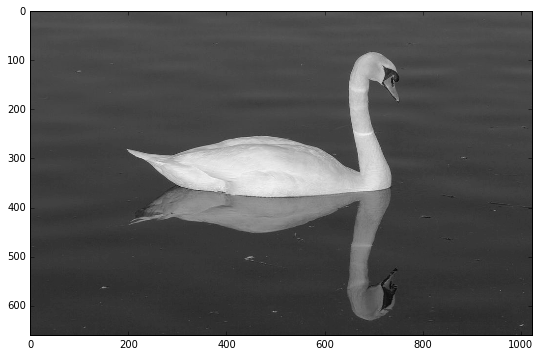

<PIL.Image.Image image mode=LA size=1024x660 at 0x1149CCFA0>


In [ ]:
from six.moves import urllib #Librería para descargar archivos
from PIL import Image #Librería para abrir imágenes
import matplotlib.pyplot as plt #Librería para graficar
import numpy as np #Librería para operaciones matemáticas

plt.style.use('classic') #Estilo de gráficas a utilizar en el notebook
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA') #Descarga la imagen y la convierte a escala de grises
#img = Image.open('lucy.jpg')
imggray = img.convert('LA') #Convierte la imagen a escala de grises
imgmat = np.array(list(imggray.getdata(band=0)),float) #Convierte la imagen a una matriz

print(imgmat) #Imprime la matriz de la imagen

imgmat.shape = (imggray.size[1],imggray.size[0]) #Cambia el tamaño de la matriz

plt.figure(figsize=(9,6)) #Tamaño de la figura
plt.imshow(imgmat,cmap='gray') #Muestra la imagen
plt.show() #Muestra la imagen
print(img) #Imprime la imagen

In [ ]:
U,D,V = np.linalg.svd(imgmat) #Descomposición de la matriz de la imagen
imgmat.shape # Imprime el tamaño de la matriz


(660, 1024)

In [ ]:
U.shape # Imprime el tamaño de la matriz U

(660, 660)

In [ ]:
V.shape # Imprime el tamaño de la matriz V

(1024, 1024)

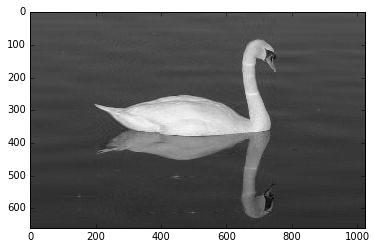

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50 #Número de valores a utilizar
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) #Reconstrucción de la imagen con los valores elegidos
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

[233. 233. 233. ...  41.  40.  40.]


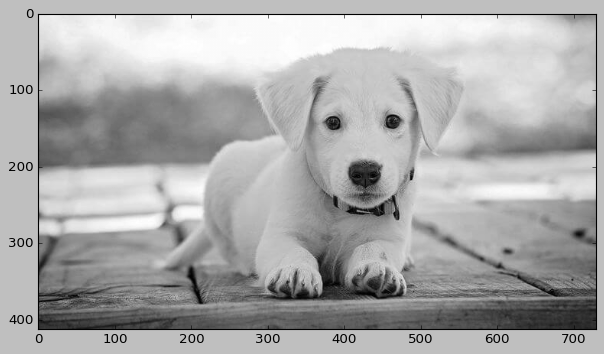

<PIL.Image.Image image mode=LA size=730x412 at 0x118557040>


In [ ]:
#imagen 1
#Importamos la librería para descargar archivos
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic') #Estilo de gráficas a utilizar en el notebook
img = Image.open(urllib.request.urlopen('https://arbolabc.nyc3.cdn.digitaloceanspaces.com/Science/animals/articles/animales-domesticos/dog.jpg')).convert('LA')
imggray = img.convert('LA') #Convierte la imagen a escala de grises
imgmat = np.array(list(imggray.getdata(band=0)),float) #Convierte la imagen a una matriz

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0]) #Cambia el tamaño de la matriz

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat) #Descomposición de la matriz de la imagen
imgmat.shape # Imprime el tamaño de la matriz

(412, 730)

In [ ]:
U.shape # Imprime el tamaño de la matriz U

(412, 412)

In [ ]:
V.shape # Imprime el tamaño de la matriz V

(730, 730)

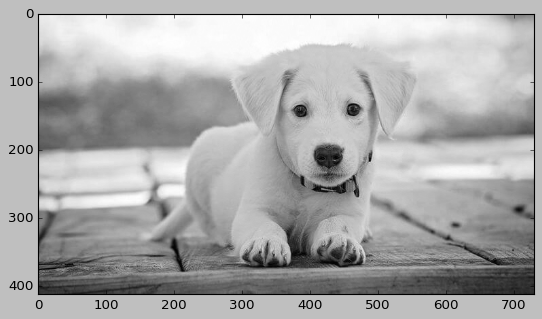

Felicidades la imagen está comprimida


In [ ]:
nvalue = 200 #Número de valores a utilizar 
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) #Reconstrucción de la imagen con los valores elegidos
plt.imshow(reconstimg,cmap='gray') #Muestra la imagen
plt.show()
print("Felicidades la imagen está comprimida")

[131. 131. 131. ... 141. 141. 141.]


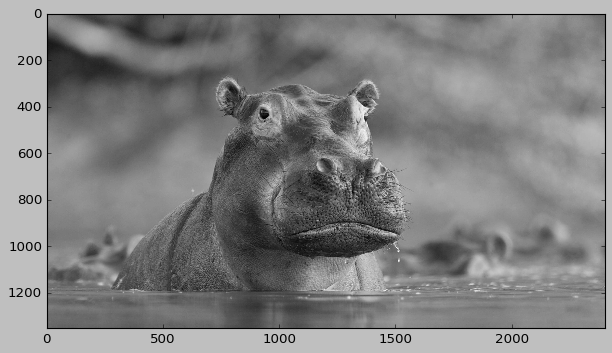

<PIL.Image.Image image mode=LA size=2400x1350 at 0x1184FFEB0>


In [ ]:
#imagen 2
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://aldf.org/wp-content/uploads/2021/10/GettyImages-141467674-crop.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat) 
imgmat.shape = (imggray.size[1],imggray.size[0]) 

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat) #Descomposición de la matriz de la imagen
imgmat.shape # Imprime el tamaño de la matriz

(1350, 2400)

In [ ]:
U.shape # Imprime el tamaño de la matriz U

(1350, 1350)

In [ ]:
V.shape # Imprime el tamaño de la matriz V

(2400, 2400)

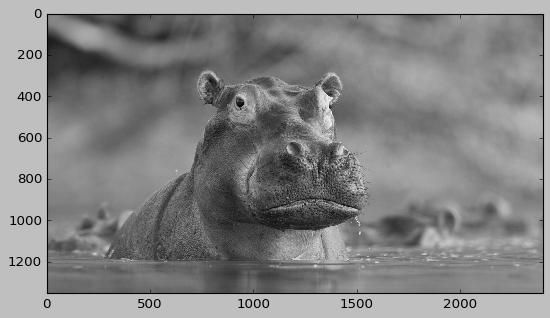

Felicidades la imagen está comprimida


In [ ]:
nvalue = 400 #Número de valores a utilizar
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:]) #Reconstrucción de la imagen con los valores elegidos
plt.imshow(reconstimg,cmap='gray') #Muestra la imagen
plt.show()
print("Felicidades la imagen está comprimida") #Imprime el mensaje

[103. 103. 103. ... 123. 122. 120.]


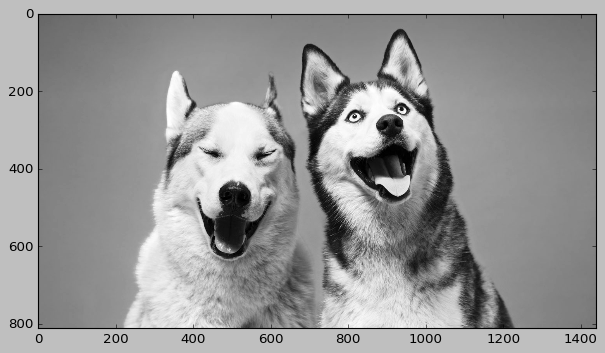

<PIL.Image.Image image mode=LA size=1440x810 at 0x114C53730>


In [ ]:
#imagen 3
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.sciencenews.org/wp-content/uploads/2022/04/040922_animal-emotions_feat_extra-headline-space.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(810, 1440)

In [ ]:
U.shape

(810, 810)

In [ ]:
V.shape

(1440, 1440)

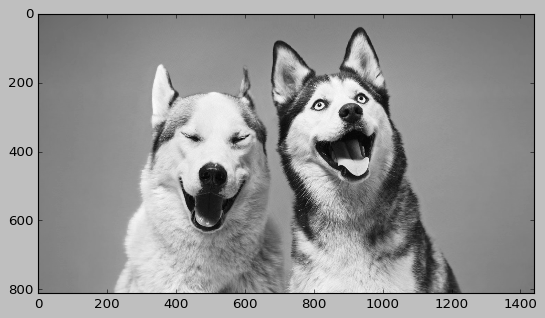

Felicidades la imagen está comprimida


In [ ]:
nvalue = 300
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

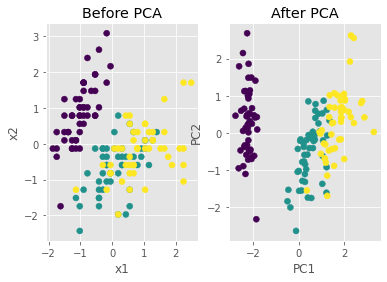

In [ ]:
# Plot the data in the PCA space for the first two principal components
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [ ]:
# Load the data
np.cov(X_new.T)


array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:

pca.explained_variance_ #Esto es lo que se llama varianza explicada


array([2.93808505, 0.9201649 ])

In [ ]:
print(abs( pca.components_ )) #Esto es lo que se llama carga de componentes


[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
def biplot(score, coeff , y): #Función para graficar el biplot 
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

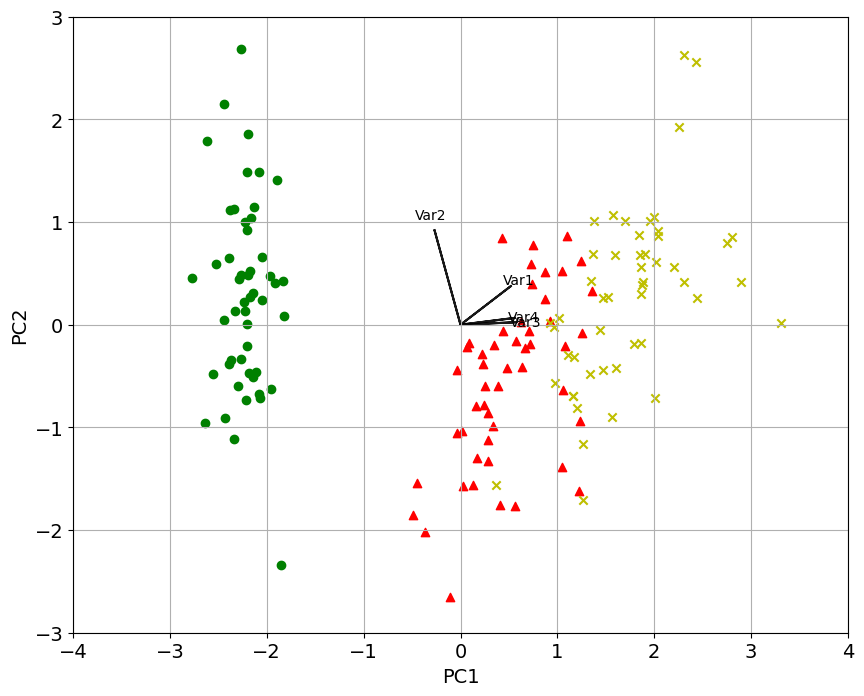

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
np.corrcoef(X[:,2], X[:,3])[1,0] 

0.9628654314027957

In [ ]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

¿Qué es feature importance y para qué nos sirve?
> Un feature importance se refiere a las tecnicas que calculan una puntuacion para cada variable de entrada de un modelo de aprendizaje automatico. Nos sirve para saber que variables son mas importantes para el modelo y asi poder eliminar las que no lo son y asi mejorar el modelo.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
> Pude comprender mejor el funcionamiento de la descomposición en valores singulares y como se puede utilizar para comprimir imágenes, además de que se puede utilizar para reducir la dimensionalidad de los datos, lo cual es muy útil para el análisis de datos.

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
>Lo aplicaría en el análisis de datos para poder reducir la dimensionalidad de los datos y poder hacer un análisis más rápido y eficiente. 

> En  particular me gustaría aplicarlo en el área de la medicina, ya que en la actualidad se están realizando estudios para poder detectar enfermedades a través de imágenes, por ejemplo, en el caso de la diabetes, se puede detectar a través de la retina, por lo que se podría aplicar este conocimiento para poder detectar cualquier enfermedad mediante imágenes.